<a href="https://colab.research.google.com/github/yaseminaltinkilit/Medikal-Maliyet-Analizi/blob/main/ml_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#skitlearn models import:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score

In [4]:
data= pd.read_csv("/content/insurance.csv")
df= data.copy()
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [7]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [11]:
import warnings
warnings.filterwarnings("ignore")

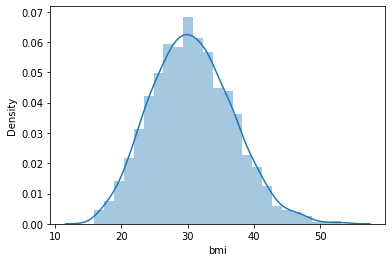

In [12]:
sns.distplot(df['bmi'])

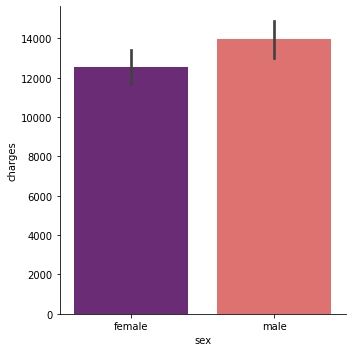

In [13]:
#“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
sns.factorplot(x='sex',y='charges',data=df ,kind='bar',palette='magma');


#“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
sns.factorplot(x='smoker',y='region',data=df ,kind='bar',palette='magma');


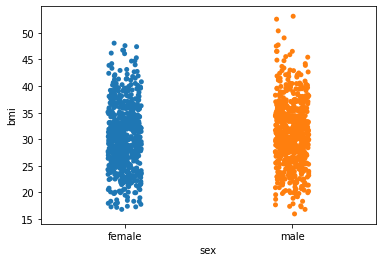

In [14]:
#“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
sns.stripplot(x="sex", y="bmi", data=df, jitter=True);

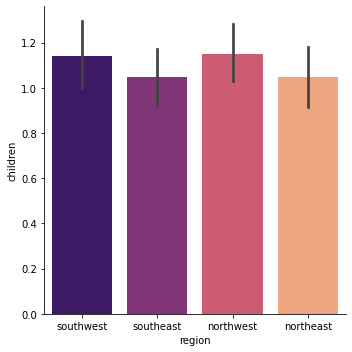

In [15]:
#En çok “children”’a sahip “region”’ı bulunuz.
sns.factorplot(x='region',y='children',data=df ,kind='bar',palette='magma')


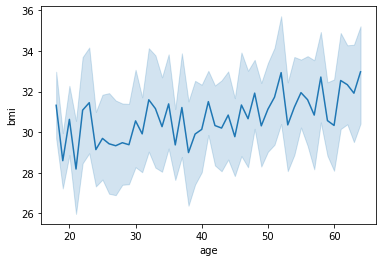

In [16]:
#“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz
sns.lineplot( df['age'], df['bmi'])

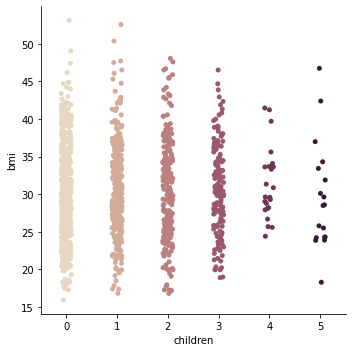

In [17]:
#bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
sns.catplot(x="children",y= "bmi", palette="ch:.25", data= df)

ValueError: ignored

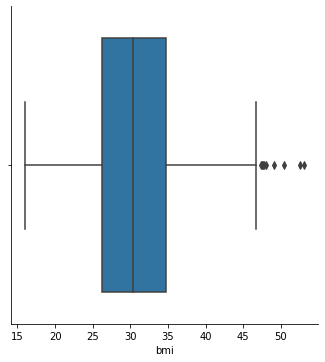

In [19]:
#“bmi” değişkeninde outlier var mıdır? İnceleyiniz
sns.catplot(df["bmi"], kind="box", dodge=False, data= df)

<function matplotlib.pyplot.show(*args, **kw)>

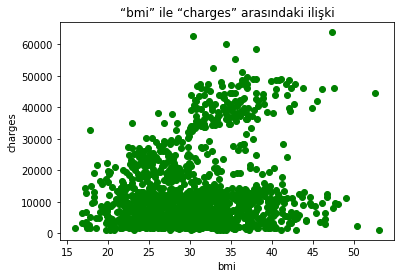

In [20]:
#“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
plt.scatter(x=df["bmi"], y= df["charges"], color= "green")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("“bmi” ile “charges” arasındaki ilişki")
plt.show

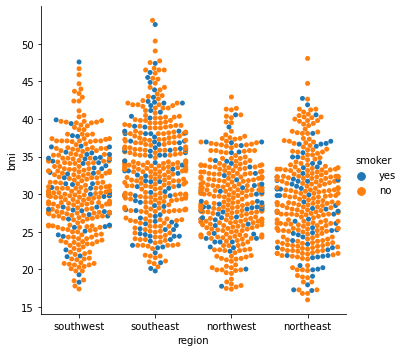

In [21]:
#“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz
sns.catplot(x="region", y="bmi", hue="smoker",
            kind="swarm", data= df)

In [22]:
from pandas_profiling import ProfileReport

In [23]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [26]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
#label encoding uyguluyorum. Kategorik verileri işleyebilmek için.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df['smoker']= le.fit_transform(df['smoker'])
df['region']= le.fit_transform(df['region'])
df['sex'].unique()

array([0, 1])

In [28]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

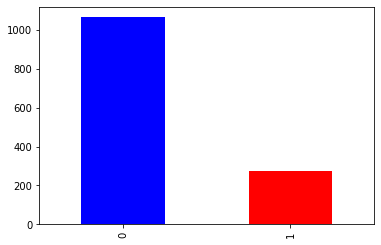

In [29]:
df["smoker"].value_counts().plot(kind= "bar", color=["blue","red"])

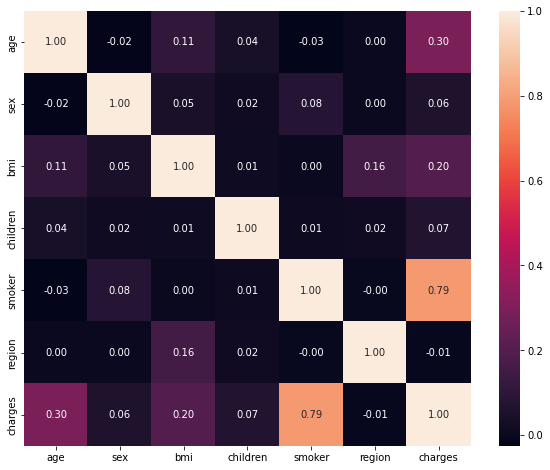

In [30]:
#corr
corr=df.corr()
fig,ax= plt.subplots(figsize= (10,8))
ax= sns.heatmap(corr, annot= True, fmt= ".2f")

In [32]:
!pip install chart_studio
!conda install -c conda-forge cufflinks-py
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=43aadbab1e28013639264c19e42d74ef1169f1e25a93e592f19a3b864238c325
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


pip install chart_studio

conda install -c conda-forge cufflinks-py 

pip install cufflinks

In [33]:
df.shape

(1338, 7)

In [34]:
list_of_num = ['int64','float64']
numeric_df = df.select_dtypes(list_of_num)

In [35]:
from chart_studio import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
fig = px.box(numeric_df.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=3, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=3, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='gray')

#encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df['smoker']= le.fit_transform(df['smoker'])
df['region']= le.fit_transform(df['region'])
df['sex'].unique()

In [36]:
#model:
import sklearn
y = df["charges"]
X = df.drop(["charges"], axis=1)


ValueError: ignored

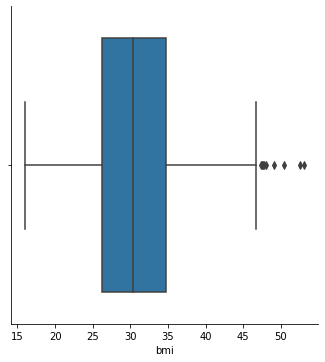

In [37]:
sns.catplot(df["bmi"], kind="box", dodge=False, data= df)

In [38]:
#split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =sklearn.model_selection.train_test_split(X, y, train_size=0.8)

In [39]:
#scaler:

y_train = y_train.to_frame()
y_test = y_test.to_frame()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in [X_train, X_test, y_train, y_test]:
 scaler.fit_transform(i)
 print(scaler.mean_)

array([[-0.49965752,  1.00187091,  0.72618309,  0.73709561, -0.50729114,
         1.3691499 ],
       [ 0.13740086,  1.00187091, -0.19717513,  3.22247051, -0.50729114,
        -1.36574194],
       [-1.41985295,  1.00187091,  0.67636161, -0.91982099,  1.97125461,
         1.3691499 ],
       ...,
       [-0.21652046,  1.00187091, -0.32338956,  1.56555391, -0.50729114,
        -1.36574194],
       [ 1.6238704 ,  1.00187091,  1.09154067, -0.91982099, -0.50729114,
         1.3691499 ],
       [ 1.12838055, -0.99813258,  0.44967384,  0.73709561, -0.50729114,
        -0.45411132]])

[39.0588785   0.49906542 30.82728972  1.11028037  0.2046729   1.49813084]


array([[-0.27739515,  0.94197874,  0.53465797,  0.80873159,  1.96792461,
         1.24999483],
       [ 1.183153  ,  0.94197874, -1.24703518, -0.86493687, -0.50814955,
         1.24999483],
       [ 0.37985152, -1.06159509,  0.48735638, -0.86493687, -0.50814955,
         1.24999483],
       ...,
       [ 0.08774189, -1.06159509,  0.25084844, -0.86493687, -0.50814955,
         1.24999483],
       [-0.13134034,  0.94197874,  1.32144104,  1.64556582,  1.96792461,
         0.36609347],
       [ 1.32920782, -1.06159509, -0.28287114, -0.86493687, -0.50814955,
        -0.51780789]])

[39.79850746  0.52985075 30.00904851  1.03358209  0.20522388  1.5858209 ]


array([[-0.71758075],
       [-0.34186859],
       [ 1.7717258 ],
       ...,
       [-0.54606224],
       [-0.03176151],
       [-0.09033913]])

[13364.14953646]


array([[ 2.11601469e+00],
       [-1.92298039e-01],
       [-4.60290350e-01],
       [-7.79067547e-01],
       [ 2.42493543e-01],
       [ 2.43167066e-01],
       [ 7.82363868e-01],
       [-9.74685765e-01],
       [ 2.49365619e+00],
       [ 4.76488032e-02],
       [ 2.92512244e+00],
       [-9.64585989e-01],
       [-8.85463641e-01],
       [-9.66383990e-01],
       [-5.49238320e-02],
       [-8.65376596e-01],
       [-4.77801169e-01],
       [ 3.11897720e-01],
       [-8.07189988e-01],
       [-4.28403130e-01],
       [ 2.81864703e+00],
       [-6.75773547e-01],
       [-4.37203066e-01],
       [-4.07107255e-01],
       [ 1.26078328e+00],
       [-7.59511058e-01],
       [-6.90278530e-01],
       [-8.16911392e-01],
       [-2.34725196e-01],
       [-3.37571047e-01],
       [-5.56455985e-01],
       [-3.11080380e-01],
       [-7.38660305e-01],
       [ 8.48760598e-02],
       [-9.18065784e-01],
       [ 6.70633632e-01],
       [ 1.73483348e-01],
       [-3.77552382e-01],
       [-6.3

[12896.21263713]


In [40]:
#Model seçimi ve eğitilmesi:
import sklearn.linear_model
lin_model = sklearn.linear_model.LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [41]:
predictions = lin_model.predict(X_test)
print(predictions)

[[32265.09332934]
 [ 8447.8001303 ]
 [ 9739.62615309]
 [ 7609.23799669]
 [27038.3690143 ]
 [ 8838.78224734]
 [32520.14055835]
 [ 4589.23561628]
 [36391.30965255]
 [16128.20191824]
 [39714.47956577]
 [ 3764.45304734]
 [ 6673.78035156]
 [-1648.25674735]
 [11314.77531669]
 [ 3847.21302961]
 [ 5515.89646351]
 [27547.40663147]
 [ 2934.68809605]
 [ 8424.16914729]
 [39051.23111983]
 [ 5323.9150023 ]
 [ 7096.41437538]
 [ 7339.39684361]
 [36896.28581549]
 [ 4106.4090426 ]
 [ 5342.33548673]
 [ 3006.53254289]
 [ 7869.55964895]
 [ 9821.77892175]
 [ 8433.04921747]
 [12508.3490077 ]
 [ 6183.69152456]
 [14949.02187691]
 [ 4204.56467493]
 [31310.88323384]
 [12509.63838532]
 [13625.51177875]
 [ 6203.64454318]
 [ 7581.34824943]
 [11050.24254197]
 [12842.60568378]
 [11808.68341261]
 [10366.47549994]
 [11842.84114226]
 [30023.3153043 ]
 [  291.33989522]
 [ 4022.64286992]
 [ 9986.4272269 ]
 [13465.25072245]
 [32058.40433059]
 [ 6272.5890641 ]
 [ 1674.20826116]
 [ 8108.22011965]
 [14203.0345839 ]
 [ 6479.10

In [42]:
for i in range(len(X_test)):
    print(f"{i}: Actual Value: {y_test.index[i]} - Predicted Value: {predictions[i]}")

0: Actual Value: 1207 - Predicted Value: [32265.09332934]
1: Actual Value: 1089 - Predicted Value: [8447.8001303]
2: Actual Value: 445 - Predicted Value: [9739.62615309]
3: Actual Value: 699 - Predicted Value: [7609.23799669]
4: Actual Value: 99 - Predicted Value: [27038.3690143]
5: Actual Value: 1253 - Predicted Value: [8838.78224734]
6: Actual Value: 280 - Predicted Value: [32520.14055835]
7: Actual Value: 866 - Predicted Value: [4589.23561628]
8: Actual Value: 615 - Predicted Value: [36391.30965255]
9: Actual Value: 499 - Predicted Value: [16128.20191824]
10: Actual Value: 39 - Predicted Value: [39714.47956577]
11: Actual Value: 723 - Predicted Value: [3764.45304734]
12: Actual Value: 942 - Predicted Value: [6673.78035156]
13: Actual Value: 1251 - Predicted Value: [-1648.25674735]
14: Actual Value: 935 - Predicted Value: [11314.77531669]
15: Actual Value: 1158 - Predicted Value: [3847.21302961]
16: Actual Value: 1290 - Predicted Value: [5515.89646351]
17: Actual Value: 727 - Predict

In [43]:
r2 = sklearn.metrics.r2_score(y_test, predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

In [44]:
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R2: 0.7391319241913104
MAE: 4192.216258387072
MSE: 37941961.379703894


In [45]:
#model 0.78 lik bir accusary değerine sahip. %78 doğruluk tahmini.
#mae gerçek değerlerle tahmin edilen değerlerin farklarının mutlak değerinin ortalaması.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install xgboost
from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [47]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                      ("LR",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                      ("DT",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                      ("RF",RandomForestRegressor())])

pipeline_knn=Pipeline([("scalar4",StandardScaler()),
                       ("KN",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                       ("XGB",XGBRegressor())])

pipeline_svm=Pipeline([("scalar6",StandardScaler()),
                      ("SVM",SVR())])

pipeline_abr=Pipeline([("scalar7",StandardScaler()),
                      ("ABR",AdaBoostRegressor())])

pipeline_gbr=Pipeline([("scalar8",StandardScaler()),
                      ("GBR",GradientBoostingRegressor())])

pipeline_cbr=Pipeline([("scalar9",StandardScaler()),
                      ("CBR",CatBoostRegressor(logging_level='Silent'))])

pipeline_lasso=Pipeline([("scalar10",StandardScaler()),
                         
                      ("Lasso",Lasso())])

pipeline_ridge=Pipeline([("scalar11",StandardScaler()),
                      ("Ridge",Ridge())])

pipeline_br=Pipeline([("scalar12",StandardScaler()),
                      ("BR",BayesianRidge())])

pipeline_en=Pipeline([("scalar13",StandardScaler()),
                      ("EN",ElasticNet())])

pipeline_hr=Pipeline([("scalar14",StandardScaler()),
                      ("HR",HuberRegressor())])


In [48]:
#List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_xgb,pipeline_svm,pipeline_abr,pipeline_gbr,pipeline_cbr,pipeline_lasso,pipeline_ridge,
            pipeline_br,pipeline_en,pipeline_hr]
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor",
             5: "SVM",6: "ABR",7: "GBR",8: "CBR",9: "Lasso",10: "Ridge",
             11: "BR",12: "EN",13: "HR"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    print(pipe, (metrics.r2_score(y_test, predictions)))

Pipeline(steps=[('scalar1', StandardScaler()), ('LR', LinearRegression())])

Pipeline(steps=[('scalar1', StandardScaler()), ('LR', LinearRegression())]) 0.7391319241913104


Pipeline(steps=[('scalar2', StandardScaler()), ('DT', DecisionTreeRegressor())])

Pipeline(steps=[('scalar2', StandardScaler()), ('DT', DecisionTreeRegressor())]) 0.7719940177462126


Pipeline(steps=[('scalar3', StandardScaler()), ('RF', RandomForestRegressor())])

Pipeline(steps=[('scalar3', StandardScaler()), ('RF', RandomForestRegressor())]) 0.8645011691233171


Pipeline(steps=[('scalar4', StandardScaler()), ('KN', KNeighborsRegressor())])

Pipeline(steps=[('scalar4', StandardScaler()), ('KN', KNeighborsRegressor())]) 0.7948523210043493
[19:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('scalar5', StandardScaler()), ('XGB', XGBRegressor())])

Pipeline(steps=[('scalar5', StandardScaler()), ('XGB', XGBRegressor())]) 0.8836499156920268


Pipeline(steps=[('scalar6', StandardScaler()), ('SVM', SVR())])

Pipeline(steps=[('scalar6', StandardScaler()), ('SVM', SVR())]) -0.07225507214269666


Pipeline(steps=[('scalar7', StandardScaler()), ('ABR', AdaBoostRegressor())])

Pipeline(steps=[('scalar7', StandardScaler()), ('ABR', AdaBoostRegressor())]) 0.8437004623647744


Pipeline(steps=[('scalar8', StandardScaler()),
                ('GBR', GradientBoostingRegressor())])

Pipeline(steps=[('scalar8', StandardScaler()),
                ('GBR', GradientBoostingRegressor())]) 0.8814684298114062


Pipeline(steps=[('scalar9', StandardScaler()),
                ('CBR',
                 <catboost.core.CatBoostRegressor object at 0x7fbbe3691950>)])

Pipeline(steps=[('scalar9', StandardScaler()),
                ('CBR',
                 <catboost.core.CatBoostRegressor object at 0x7fbbe3691950>)]) 0.8580187366430468


Pipeline(steps=[('scalar10', StandardScaler()), ('Lasso', Lasso())])

Pipeline(steps=[('scalar10', StandardScaler()), ('Lasso', Lasso())]) 0.7391434045108152


Pipeline(steps=[('scalar11', StandardScaler()), ('Ridge', Ridge())])

Pipeline(steps=[('scalar11', StandardScaler()), ('Ridge', Ridge())]) 0.7391908599186778


Pipeline(steps=[('scalar12', StandardScaler()), ('BR', BayesianRidge())])

Pipeline(steps=[('scalar12', StandardScaler()), ('BR', BayesianRidge())]) 0.7392457925685386


Pipeline(steps=[('scalar13', StandardScaler()), ('EN', ElasticNet())])

Pipeline(steps=[('scalar13', StandardScaler()), ('EN', ElasticNet())]) 0.6686132800022537


Pipeline(steps=[('scalar14', StandardScaler()), ('HR', HuberRegressor())])

Pipeline(steps=[('scalar14', StandardScaler()), ('HR', HuberRegressor())]) 0.6416271497402446


In [49]:
from sklearn.model_selection import cross_val_score
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="r2", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.737599 
DecisionTree: 0.675645 
RandomForest: 0.824769 
KNeighbors: 0.799661 
[19:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:09] WA

In [50]:
#GBR modeli en yüksek başarı aldığımız model.

In [51]:
pred = pipeline_cbr.predict(X_test)
# Model Değerlendirmesi
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae]]
# Dataframe oluşturma
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,index = ["R-Squared","Adjusted R-Squared","mae"])
Results.style.background_gradient(cmap="Greys")
 